<a href="https://colab.research.google.com/github/erskinekof/erskinekof.github.io/blob/master/Dr_Erskine_feb_2_2026_vanet_editing_network_project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 📌 Step 1: Imports and Dataset Load
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score



In [ ]:

# Load your dataset
df = pd.read_csv("vanet_malicious_nodes.csv")
print("🔍 Dataset Overview:")
print(df.head())


🔍 Dataset Overview:
   node_id  position_x  position_y      speed   direction  acceleration  \
0        1  374.540119  393.635520  11.209225  179.881288      1.379990   
1        2  950.714306  473.435659   9.987363  268.828838     -1.892928   
2        3  731.993942  854.547393   5.284617  202.560041     -0.920162   
3        4  598.658484  340.004386  18.218000   29.988930      0.979684   
4        5  156.018640  869.649685  14.298725   66.808885     -0.107464   

   packet_sent  packet_received  packet_drop_ratio    latency  \
0          459              227           0.505447  83.298076   
1           75              399           4.320000  25.828200   
2          177              433           1.446328  46.603139   
3          450              332           0.262222  16.919542   
4          272              211           0.224265  41.015882   

   message_retransmission_count  signal_strength  trust_score  \
0                             9       -74.868555     0.733277   
1       

In [ ]:
# 🔍 Check unique labels and data info
print("\n🧾 Unique Labels (Malicious or Not):", df['is_malicious'].unique())
print("\n🧾 Data Summary:")
print(df.describe())



🧾 Unique Labels (Malicious or Not): [0 1]

🧾 Data Summary:
           node_id   position_x   position_y        speed    direction  \
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean   2500.500000   496.831991   491.487124    15.041252   182.766492   
std    1443.520003   289.633651   285.616509     8.723095   103.610238   
min       1.000000     0.011635     0.052827     0.004732     0.090884   
25%    1250.750000   243.862807   247.145908     7.415020    94.582543   
50%    2500.500000   500.008626   485.971574    14.885914   184.481870   
75%    3750.250000   748.100863   733.371598    22.818570   270.398007   
max    5000.000000   999.717673   999.505190    29.994154   359.972938   

       acceleration  packet_sent  packet_received  packet_drop_ratio  \
count   5000.000000  5000.000000      5000.000000        5000.000000   
mean       0.052663   273.669000       253.872200           0.820569   
std        1.732448   131.216381       131.068115        

C:\Users\SErskine\AppData\Local\Temp\ipykernel_44072\2565128308.py:8: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  plt.tight_layout()
C:\Users\SErskine\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128721 (\N{OCTAGONAL SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


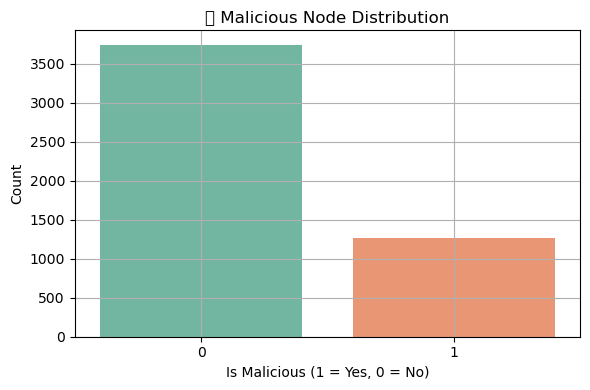

In [ ]:

# 📉 Distribution of Malicious vs Non-Malicious Nodes
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='is_malicious', palette='Set2')
plt.title("🛑 Malicious Node Distribution")
plt.xlabel("Is Malicious (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
# ✂️ Step 2: Data Preprocessing
# Drop irrelevant or ID-like columns
df.drop(columns=['node_id'], inplace=True, errors='ignore')


C:\Users\SErskine\AppData\Local\Temp\ipykernel_44072\4219911457.py:5: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  plt.tight_layout()
C:\Users\SErskine\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


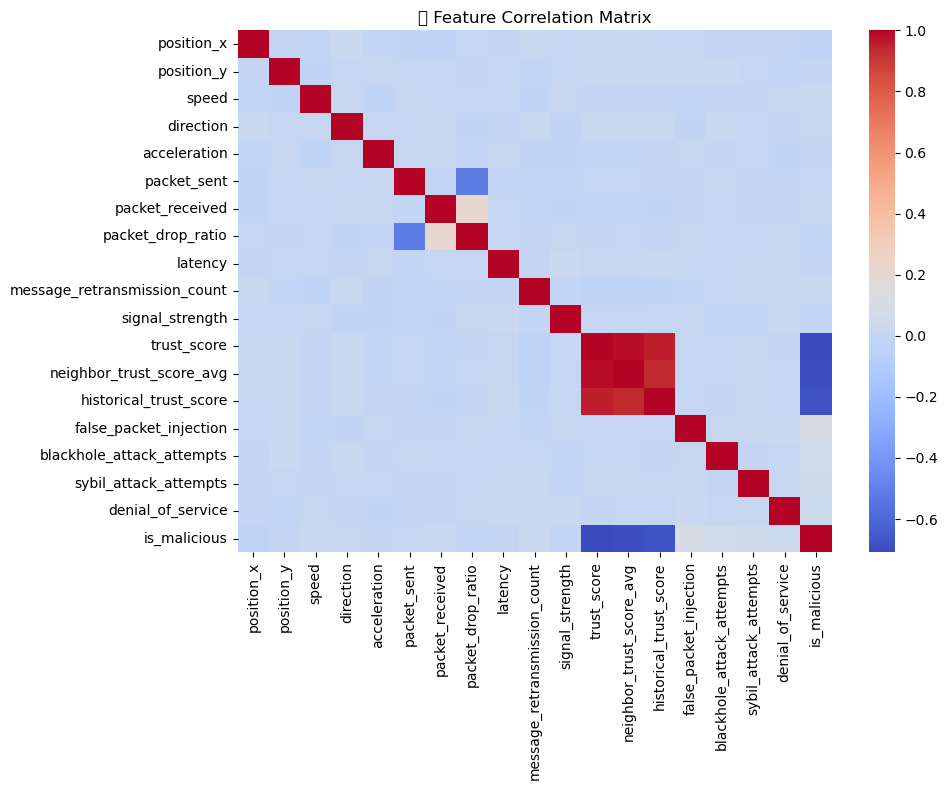

In [ ]:

# 📊 Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title("🔗 Feature Correlation Matrix")
plt.tight_layout()
plt.show()



In [ ]:
# 🎯 Feature and Target split
X = df.drop('is_malicious', axis=1)
y = df['is_malicious']



In [ ]:
# 📤 Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# 🌲 Train ML Model
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [ ]:
# 📈 Predictions
y_pred = clf.predict(X_test)

# 📋 Evaluation
print("✅ Classification Report:")
print(classification_report(y_test, y_pred))



✅ Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       759
           1       1.00      1.00      1.00       241

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



C:\Users\SErskine\AppData\Local\Temp\ipykernel_44072\1284080197.py:8: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  plt.tight_layout()
C:\Users\SErskine\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


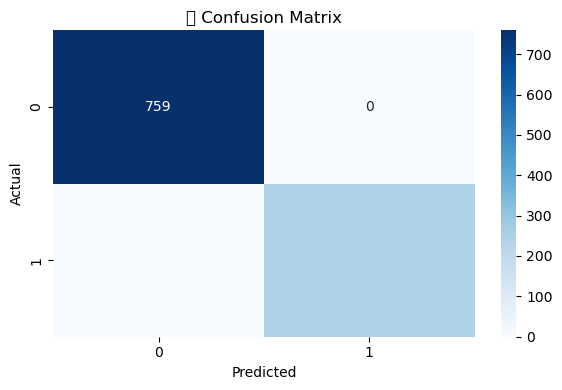

In [ ]:
# 📉 Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title("📊 Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()



In [ ]:

# 🧮 Accuracy Score
acc = accuracy_score(y_test, y_pred)
print(f"📌 Model Accuracy: {acc*100:.2f}%")


📌 Model Accuracy: 100.00%


C:\Users\SErskine\AppData\Local\Temp\ipykernel_44072\3347139652.py:5: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  plt.tight_layout()
C:\Users\SErskine\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128293 (\N{FIRE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


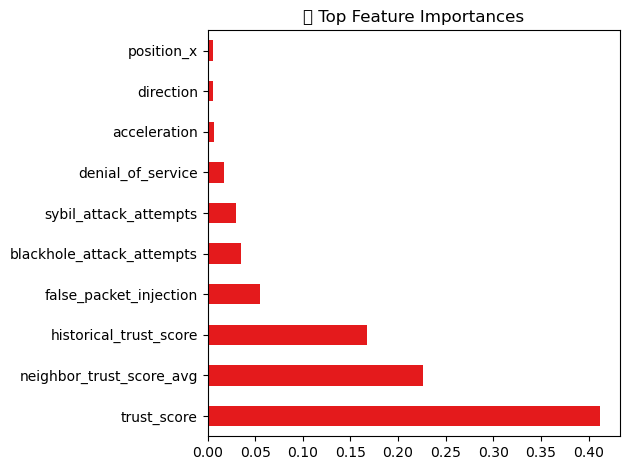

In [ ]:
# 🎯 Feature Importance
feat_importances = pd.Series(clf.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh', colormap='Set1')
plt.title("🔥 Top Feature Importances")
plt.tight_layout()
plt.show()


In [ ]:
#XGBOOST-Best Score
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from matplotlib import font_manager as fm
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
import time
from joblib import dump, load
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
train = pd.read_csv("vanet_malicious_nodes.csv")
test = pd.read_csv("vanet_malicious_nodes.csv")
sample_submission = pd.read_csv("vanet_malicious_nodes.csv")
train.head()

,node_id,position_x,position_y,speed,direction,acceleration,packet_sent,packet_received,packet_drop_ratio,latency,message_retransmission_count,signal_strength,trust_score,neighbor_trust_score_avg,historical_trust_score,false_packet_injection,blackhole_attack_attempts,sybil_attack_attempts,denial_of_service,is_malicious
0,1,374.540119,393.635520,11.209225,179.881288,1.379990,459,227,0.505447,83.298076,9,-74.868555,0.733277,0.716781,0.872712,43,3,1,3,0
1,2,950.714306,473.435659,9.987363,268.828838,-1.892928,75,399,4.320000,25.828200,0,-67.572385,0.893911,0.953454,0.787912,16,1,0,1,0
2,3,731.993942,854.547393,5.284617,202.560041,-0.920162,177,433,1.446328,46.603139,0,-51.096694,0.928744,0.965995,1.038160,9,4,1,3,0
3,4,598.658484,340.004386,18.218000,29.988930,0.979684,450,332,0.262222,16.919542,8,-42.640682,0.445287,0.403115,0.391917,36,1,0,4,0
4,5,156.018640,869.649685,14.298725,66.808885,-0.107464,272,211,0.224265,41.015882,3,-92.987558,0.282821,0.221568,0.287745,36,0,2,1,1


In [ ]:
train.tail()

,node_id,position_x,position_y,speed,direction,acceleration,packet_sent,packet_received,packet_drop_ratio,latency,message_retransmission_count,signal_strength,trust_score,neighbor_trust_score_avg,historical_trust_score,false_packet_injection,blackhole_attack_attempts,sybil_attack_attempts,denial_of_service,is_malicious
4995,4996,897.397318,857.655988,19.526505,315.733906,-1.035078,479,104,0.782881,20.639508,8,-43.506580,0.063745,0.114682,-0.081391,44,4,1,4,1
4996,4997,119.381011,897.508835,5.333950,16.853025,1.361798,400,350,0.125000,90.920760,8,-57.169187,0.757811,0.735242,0.892589,8,4,1,0,0
4997,4998,327.842838,946.707915,1.537186,109.331449,2.539645,366,204,0.442623,16.966680,4,-65.556934,0.883492,0.936885,0.896163,20,4,2,0,0
4998,4999,815.745381,397.487992,20.488848,159.595202,0.823714,92,68,0.260870,79.917429,5,-41.632568,0.298542,0.295456,0.332224,43,3,2,2,1
4999,5000,597.312378,217.140404,7.532371,62.015333,2.711031,361,462,0.279778,42.632838,6,-45.668365,0.778292,0.759197,0.797537,31,1,1,2,0


In [ ]:
train.shape

(5000, 20)

In [ ]:
train["node_id"].nunique()

5000

In [ ]:
train.isna().sum()

node_id                         0
position_x                      0
position_y                      0
speed                           0
direction                       0
acceleration                    0
packet_sent                     0
packet_received                 0
packet_drop_ratio               0
latency                         0
message_retransmission_count    0
signal_strength                 0
trust_score                     0
neighbor_trust_score_avg        0
historical_trust_score          0
false_packet_injection          0
blackhole_attack_attempts       0
sybil_attack_attempts           0
denial_of_service               0
is_malicious                    0
dtype: int64

In [ ]:
train["position_x"].value_counts()

position_x
374.540119    1
620.473785    1
758.715321    1
908.228489    1
749.977798    1
             ..
208.510514    1
851.424958    1
992.158015    1
496.963483    1
597.312378    1
Name: count, Length: 5000, dtype: int64

In [ ]:
train["is_malicious"].value_counts()

is_malicious
0    3738
1    1262
Name: count, dtype: int64

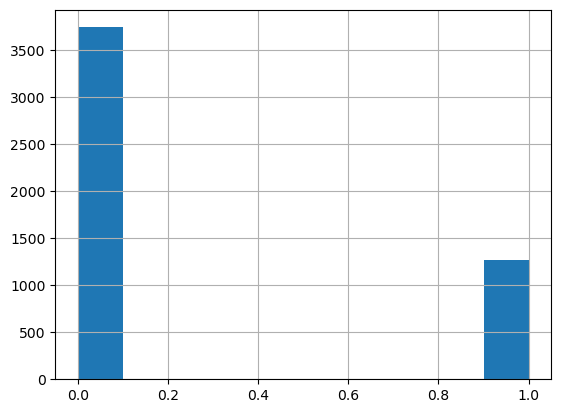

In [ ]:
train["is_malicious"].hist();

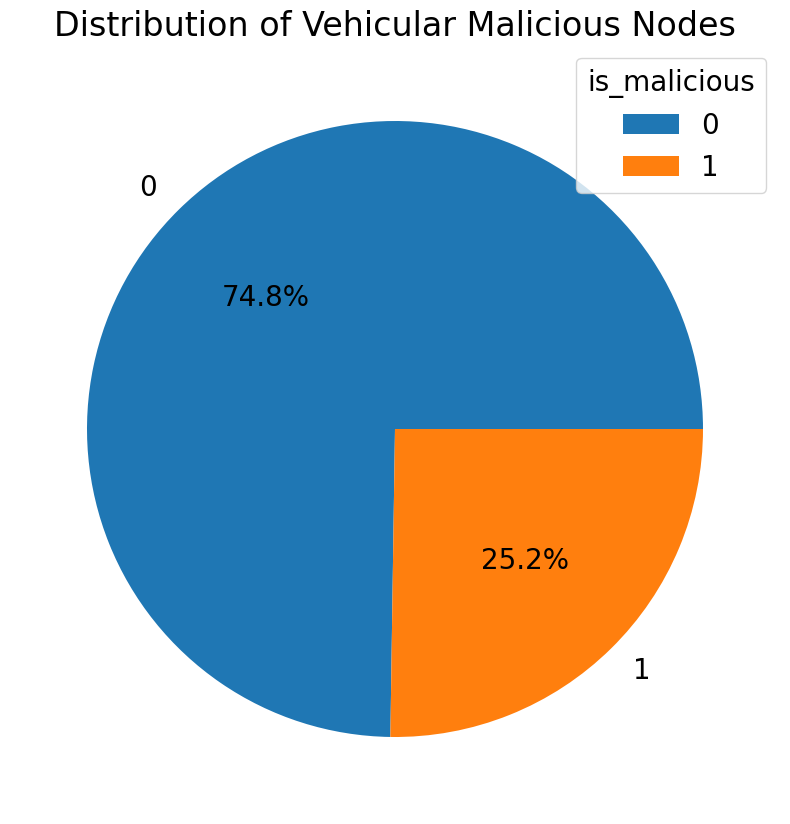

In [ ]:
plt.figure(figsize=(10,10))

plt.rcParams['font.size'] = 20

plt.pie(train["is_malicious"].value_counts().values,labels=train["is_malicious"].value_counts().index, autopct="%1.1f%%")

plt.legend(title="is_malicious")

plt.title("Distribution of Vehicular Malicious Nodes")

plt.show()

In [ ]:
test.shape

(5000, 20)

In [ ]:
test.isna().sum()

node_id                         0
position_x                      0
position_y                      0
speed                           0
direction                       0
acceleration                    0
packet_sent                     0
packet_received                 0
packet_drop_ratio               0
latency                         0
message_retransmission_count    0
signal_strength                 0
trust_score                     0
neighbor_trust_score_avg        0
historical_trust_score          0
false_packet_injection          0
blackhole_attack_attempts       0
sybil_attack_attempts           0
denial_of_service               0
is_malicious                    0
dtype: int64

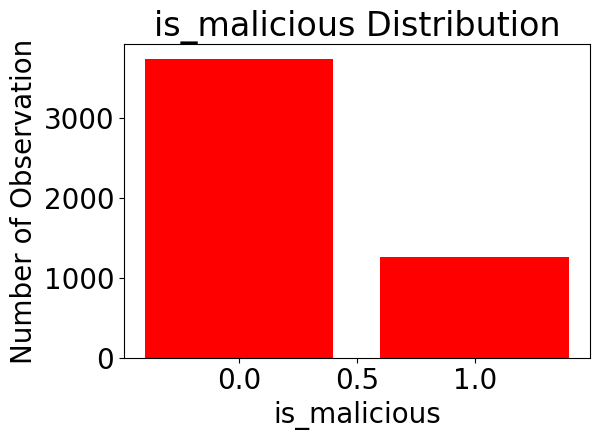

In [ ]:
plt.bar(train.is_malicious.value_counts().keys(),train.is_malicious.value_counts().values,color="r")

plt.title("is_malicious Distribution")
plt.xlabel("is_malicious")
plt.ylabel("Number of Observation")

plt.tight_layout()
plt.grid(False)

plt.show()


In [ ]:
#FXGBClassifier
xgb_model = XGBClassifier()

In [ ]:
sc = RobustScaler()
train_scaled = sc.fit_transform(X_train)
start_time = time.time()

xgb_model.fit(train_scaled,y_train)

elapsed_time = time.time() - start_time

print(f"Elapsed time for XGBoost: "
      f"{elapsed_time:.3f} seconds")

Elapsed time for XGBoost: 1.776 seconds


In [ ]:
# 📌 Imports
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# ML Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 📁 Load dataset
df = pd.read_csv("/content/sample_data/vanet_malicious_nodes.csv")

# 🧹 Preprocessing
df.drop(columns=['node_id'], inplace=True, errors='ignore')

X = df.drop('is_malicious', axis=1)
y = df['is_malicious']

# 🔄 Scale features (optional but good for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 📤 Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# =============== ⚙️ Model 1: XGBoost ===============
print("\n🚀 Training XGBoost Classifier...")
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# Evaluation
print("\n📊 XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))

cm_xgb = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm_xgb, annot=True, fmt='g', cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"✅ XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb) * 100:.2f}%")

# =============== ⚙️ Model 2: LightGBM ===============
print("\n🚀 Training LightGBM Classifier...")
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)
y_pred_lgbm = lgbm_model.predict(X_test)

# Evaluation
print("\n📊 LightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgbm))

cm_lgbm = confusion_matrix(y_test, y_pred_lgbm)
sns.heatmap(cm_lgbm, annot=True, fmt='g', cmap='Blues')
plt.title("Confusion Matrix - LightGBM")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

ModuleNotFoundError: No module named 'lightgbm'